##Reading the data

In [1]:
import pandas as pd
data = pd.read_csv('flights.csv',low_memory=False)

In [2]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330.0,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296.0,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342.0,748.0,8.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893186 entries, 0 to 2893185
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             float64
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    float64
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             float64
 24

In [4]:
df = data.head(100000)
df['DIVERTED'].value_counts()

0.0    99776
1.0      224
Name: DIVERTED, dtype: int64

## Data Visualization

In [5]:
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt 

In [6]:
df.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.497084,0.004412,-0.138130,-0.124369,0.060064,0.093451,-0.119781,-0.026285,-0.018470,-0.036330,-0.035208,-0.095731,0.037407,-0.110820,-0.091687,0.070770,0.004847,-0.006000,0.097693,-0.010550,-0.001603,0.033213,0.061960
DAY_OF_WEEK,NaN,NaN,-0.497084,1.000000,0.010955,0.046914,0.045182,0.055632,0.007291,0.044150,0.019755,0.029025,0.030678,0.024666,0.013749,-0.017789,0.031725,0.011477,0.067520,-0.000709,-0.006409,-0.019626,0.008156,0.003648,0.033729,-0.050835
FLIGHT_NUMBER,NaN,NaN,0.004412,0.010955,1.000000,-0.003027,0.010140,0.034863,0.061010,0.016377,-0.337801,-0.318819,-0.339135,-0.356196,-0.003670,0.014464,-0.018891,0.000753,0.056163,0.007155,0.090008,-0.032564,-0.007260,0.023770,0.076581,0.004246
SCHEDULED_DEPARTURE,NaN,NaN,-0.138130,0.046914,-0.003027,1.000000,0.943186,0.174254,-0.081496,0.912232,-0.019873,-0.025744,-0.011993,0.000321,0.585786,-0.027502,0.731240,0.552653,0.154951,0.002515,-0.002631,-0.112393,-0.017957,-0.054419,0.186286,-0.042004
DEPARTURE_TIME,NaN,NaN,-0.124369,0.045182,0.010140,0.943186,1.000000,0.243960,-0.070081,0.966477,-0.031873,-0.035204,-0.024384,-0.016562,0.618850,-0.017759,0.734970,0.584615,0.223654,0.006576,0.009679,-0.093096,-0.012820,-0.013304,0.247325,-0.046406
DEPARTURE_DELAY,NaN,NaN,0.060064,0.055632,0.034863,0.174254,0.243960,1.000000,0.061905,0.231399,0.005868,0.015257,0.002733,0.004591,0.090696,0.040285,0.155150,0.079639,0.950838,0.020787,0.030862,0.085794,0.008040,0.606954,0.605289,0.210402
TAXI_OUT,NaN,NaN,0.093451,0.007291,0.061010,-0.081496,-0.070081,0.061905,1.000000,-0.043114,0.096191,0.215749,0.077234,0.057871,-0.045096,0.009041,-0.062325,-0.045611,0.245363,0.009810,0.010763,0.407371,-0.008021,-0.024674,-0.129879,0.119412
WHEELS_OFF,NaN,NaN,-0.119781,0.044150,0.016377,0.912232,0.966477,0.231399,-0.043114,1.000000,-0.038173,-0.038217,-0.031646,-0.027282,0.642358,-0.015089,0.744697,0.608611,0.217344,0.006524,0.001293,-0.085582,-0.013912,-0.017376,0.223010,-0.055273


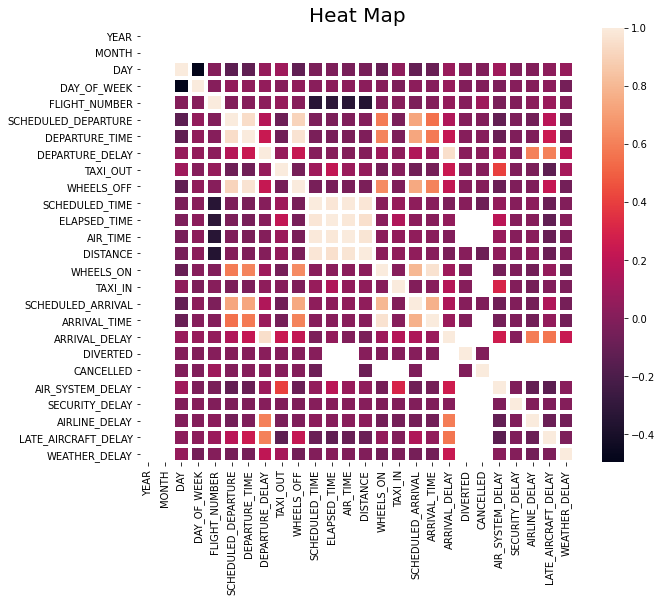

In [7]:
plt.figure(figsize=(10,8))
plt.title('Heat Map', fontsize=20)
sn.heatmap(df.corr(), cbar=True, annot =False, square=True, fmt='.2f',annot_kws={'size':15}, linewidth=3)

In [8]:
df = df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT', 'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME', 'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'], axis=1)

In [9]:
df[df.columns[1:]].corr()['ARRIVAL_DELAY'][:].sort_values()

SECURITY_DELAY         0.006070
DAY                    0.070770
ARRIVAL_TIME           0.076791
SCHEDULED_ARRIVAL      0.140565
SCHEDULED_DEPARTURE    0.154951
WEATHER_DELAY          0.235906
AIR_SYSTEM_DELAY       0.259700
LATE_AIRCRAFT_DELAY    0.572956
AIRLINE_DELAY          0.592718
DEPARTURE_DELAY        0.950838
ARRIVAL_DELAY          1.000000
DIVERTED                    NaN
CANCELLED                   NaN
Name: ARRIVAL_DELAY, dtype: float64

In [10]:
df = df.fillna(df.mean())
df.isna().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [11]:
result = []
for ind in df.index:
    if df['ARRIVAL_DELAY'][ind]>15:
      result.append(1)
    else:
      result.append(0) 
        
df['Result']  = result

In [12]:
df['Result'].value_counts()

0    63779
1    36221
Name: Result, dtype: int64

In [13]:
features=['AIR_SYSTEM_DELAY'	,'SECURITY_DELAY',	'AIRLINE_DELAY',	'LATE_AIRCRAFT_DELAY',	'WEATHER_DELAY']
df = df.drop(features,axis=1)

## MODEL PREDICTION

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [15]:
print(df.columns)
df.dtypes

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Result'],
      dtype='object')


MONTH                    int64
DAY                      int64
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_DELAY        float64
SCHEDULED_ARRIVAL      float64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               float64
CANCELLED              float64
Result                   int64
dtype: object

In [16]:
features=['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED']

X=df[features]
y=df['Result']
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.30, random_state = 42)

In [17]:
scaled_features = StandardScaler().fit_transform(train_X, val_X)

In [19]:
clf = DecisionTreeClassifier()
clf = clf.fit(train_X,train_y)

In [20]:
pred = clf.predict_proba(val_X)
auc_score = roc_auc_score(val_y, pred[:,1])
auc_score

1.0